In [61]:
import numpy as np

In [62]:
def w_n(n):
    return np.exp(-2j*np.pi/n)

def my_fft(X):
    N = len(X)
    if N == 1:
        return X
    elif N == 2:
        Y1 = X[0] + X[1]
        Y2 = X[0] - X[1]
        Y = np.append(Y1,Y2)
        return Y
    else:
        i = np.arange(N/2)
        w = w_n(N)**i
        W = np.diag(w)
        even = X[0:N-1:2]
        odd = X[1:N:2]
        Y1 = my_fft(even)
        Y2 = my_fft(odd)
        WY2 = np.dot(W,Y2)
        Y3 = Y1 + WY2
        Y4 = Y1 - WY2
        Y = np.append(Y3,Y4)
    return Y

    
    

N = 64
X = 2*np.random.randn(N,)
myY = my_fft(X)
npY = np.fft.fft(X)

print 'Relative error =', (np.linalg.norm(myY - npY)) / np.linalg.norm(npY)

 
    

Relative error = 3.90512248271e-15


Timings

In [63]:
from timeit import default_timer as timer

In [163]:
dims = [2**n for n in np.arange(0,10)]
bench_names = ['numpy.fft', 'my fft']
bench_funcs = [np.fft.fft, my_fft]
timings = {bench_name: [] for bench_name in bench_names}

for N in dims:
        X = 2*np.random.rand(N,)
        start_time = timer()
        Y = np.fft.fft(X)
        time_delta = timer() - start_time
        timings['numpy.fft'].append(time_delta)

        start_time = timer()
        Y = my_fft(X)
        time_delta = timer() - start_time
        timings['my fft'].append(time_delta)
    

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline 

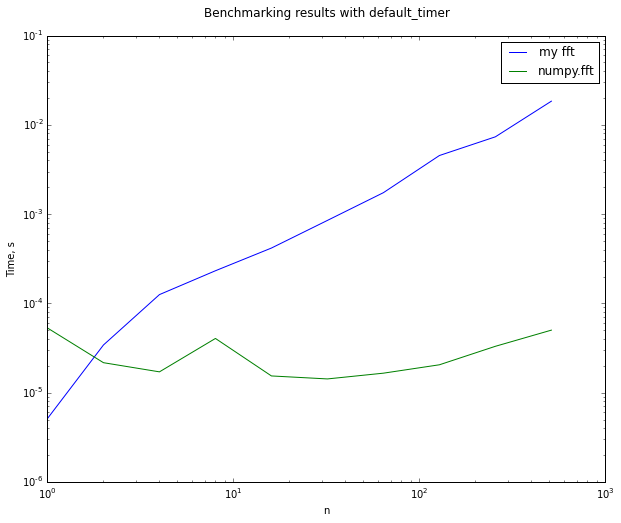

In [174]:
plt.figure(figsize=(10,8))


for bench_name, values in timings.iteritems():
    plt.semilogy(dims, values, label=bench_name)

#coef = 0.53 
#nLogn = [10**-5*coef*a*np.log2(a) for a in dims]

  
plt.legend(loc='best')
plt.title('Benchmarking results with default_timer', y=1.03)
plt.xlabel('n')
plt.ylabel('Time, s')
plt.yscale('log')
plt.xscale('log')

$T_{CT}(n)= 2T_{CT}(\frac{n}{2}) + 2(\frac{n}{2}) = 2\left(2T_{CT}(\frac{n}{4}) + 2(\frac{n}{4})\right) + 2(\frac{n}{2}) = \sum\limits_{k=1}^{p} 2^k\frac{n}{2^k} + 2^p T_{CT}\left(\frac{n}{2^p}\right) = n\cdot log_2 n + 2^{log_2 n}T_{CT}(1) = n\cdot log_2 n + n$